In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay

In [43]:
tf = pd.read_csv("Overview.csv")
tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [44]:
# Converting to datetime datatype
# tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'],format = '%Y-%m-%dT%H:%M:%S')
tf.head()


,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [45]:
cv = pd.read_csv("CurrentVoltage.csv")
cv.head()


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Converting to datetime datatype
# cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'],format = '%Y-%m-%d %H:%M:%S')
cv.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Merge both dataframes along DeviceTimeStamp
transformer = pd.merge(tf, cv, on='DeviceTimeStamp')
transformer.sample(5)


,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
11050,2019-10-31T23:00,27.0,0.0,25.0,87.0,0.0,0.0,0.0,246.5,246.0,242.9,67.9,50.5,107.3,426.0,422.5,426.0,50.3
4964,2019-08-13T23:45,32.0,0.0,28.0,41.0,0.0,0.0,0.0,229.7,229.4,231.3,76.2,65.2,107.8,395.6,397.9,400.2,38.4
20189,2020-04-11T08:45,32.0,1.0,31.0,100.0,0.0,0.0,0.0,246.1,245.5,241.8,50.7,26.5,89.7,425.0,421.5,424.9,55.7
11832,2019-11-09T19:07,24.0,0.0,25.0,86.0,0.0,0.0,0.0,243.1,242.4,241.5,123.5,115.6,132.7,420.0,418.4,421.1,14.4
19709,2020-04-06T05:30,26.0,1.0,25.0,100.0,0.0,0.0,0.0,253.0,252.1,250.5,46.8,24.3,50.5,437.3,434.4,437.8,24.7


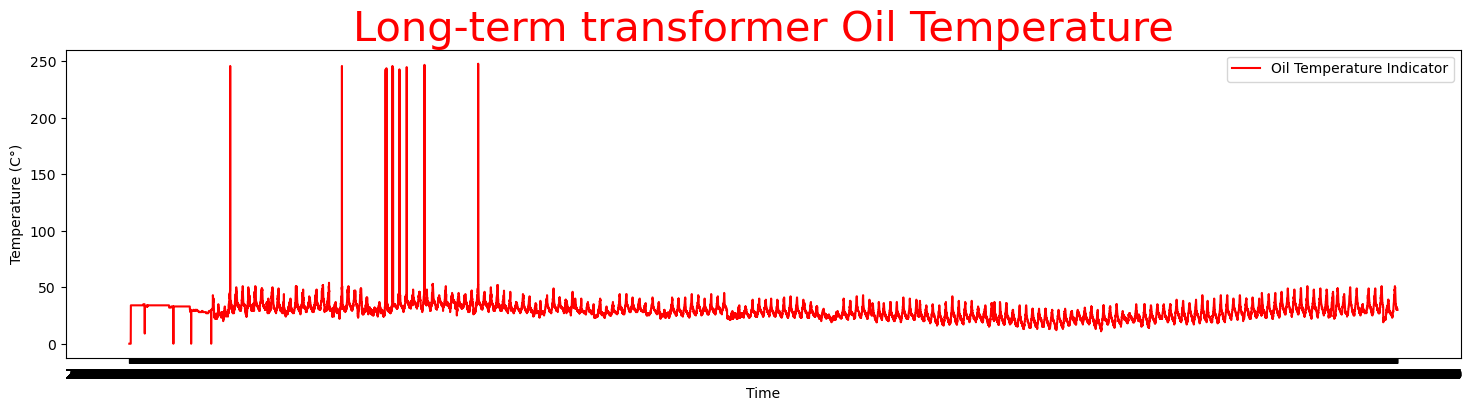

In [48]:
# Oil Temperature
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term transformer Oil Temperature",fontsize = 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show()

In [49]:
# Train test split
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1)
y = transformer['MOG_A']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)
X.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,38.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,38.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,39.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,39.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# [31, 0, 28, 45, 0, 0]
# [242, 243.2, 240.1, 71.2, 35, 80.4, 426.5, 423.24, 427.1, 42.9 ]


In [65]:
# Random Forest trained model performance analysis

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
confusion_matrix(y_test, y_pred_rf)


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.83 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.94      0.95      0.94       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093

--------------------------------------------------------


array([[3658,   26],
       [  22,  387]])

**Question:** Find if there is fault in Magnetic Oil Gauge of the transformer for the given values from sensor.
[31, 0, 28, 45, 0, 0, 242, 243.2, 240.1, 71.2, 35, 80.4, 426.5, 423.24, 427.1, 42.9 ]
Need to normalize these value before passing into the model for prediction.

The meaning of the above data in order is:
OTI- Oil Temperature Indicator
WTI- Winding Temperature Indicator
ATI- Ambient Temperature Indicator
OLI- Oil Level Indicator
OTIA- Oil Temperature Indicator Alarm
OIIT- Oil Temperature Indicator Trip
MOG_A- Magnetic oil gauge indicator

VL1- Phase Line 1
VL2- Phase Line 2
VL3- Phase Line 3

IL1- Current Line 1
IL2- Current Line 2
IL3- Current Line 3

VL12- Voltage Line 12
VL23- Voltage Line 23
VL31- Voltage Line 31
INUT- Neutral Current




In [52]:
# random_forest.predict([[31, 0, 28, 45, 0, 0, 242, 243.2, 240.1, 71.2, 35, 80.4, 426.5, 423.24, 427.1, 42.9]]
# Model Prediction using random normalized data
random_forest.predict([[0.14,
 0.0,
 0.68,
 0.06,
 0.0,
 0.0,
 0.86,
 0.85,
 0.86,
 0.76,
 0.61,
 0.67,
 0.86,
 0.87,
 0.87,
 0.08]])

array([1.])

In [53]:
# Testing prediction value on random test data
random_forest.predict([X_test[3]])

array([0.])

In [62]:
random_forest.predict([X_test[3990]])


array([1.])

In [64]:
# Model dump as joblib file to use it in web-app
import joblib
joblib.dump(random_forest, 'random_forest.joblib')

['random_forest.joblib']

In [59]:
feature_columns = X.columns
feature_columns.shape

(16,)

In [60]:
# Feature Importances
feature_importances = random_forest.feature_importances_
feature_importances.shape

(16,)

In [61]:
pd.DataFrame({'feature_columns':feature_columns, 'feature_importances':feature_importances})

,feature_columns,feature_importances
0,OTI,0.047787
1,WTI,0.000114
2,ATI,0.039377
3,OLI,0.387429
4,OTI_A,0.002571
5,OTI_T,0.001388
6,VL1,0.044424
7,VL2,0.061851
8,VL3,0.042237
9,IL1,0.048575


In [56]:
# Creating a sensor_data.csv file for simulating real-time generation of sensor data.
# pd.to_csv(X_train,'input_values.csv')
X_train
x = np.round(X_train,2)
x

array([[0.1 , 0.  , 0.5 , ..., 0.97, 0.97, 0.17],
       [0.12, 0.  , 0.64, ..., 0.93, 0.92, 0.38],
       [0.1 , 0.  , 0.5 , ..., 0.95, 0.95, 0.28],
       ...,
       [0.14, 0.  , 0.66, ..., 0.9 , 0.89, 0.31],
       [0.14, 0.  , 0.66, ..., 0.89, 0.89, 0.17],
       [0.06, 0.  , 0.3 , ..., 0.99, 0.99, 0.15]])

In [57]:
np.savetxt('sensor_data.csv', x, delimiter=",", fmt="%.2f") 

In [58]:
x_dataframe = pd.DataFrame(x)
x_dataframe.sample(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
10219,0.08,1.0,0.41,1.0,0.0,0.0,0.98,0.97,0.97,0.13,0.07,0.14,0.99,0.99,0.99,0.1
